# Analiza Success Rate projektów z kickstartera

## Cel: Przygotowanie atrybutów z DF pod aplikację mającą pomóc w wyborze determinantów gwarantującycg sukces projektu

In [1]:
#import bibliotek
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#wczytywanie DF z linku https://we.tl/t-yDSAPEXRdB

#DF=pd.read_csv('/home/nina/Infoshare - zadanka/kickstarter/kickstarter_public_kickstarter_filtered.tsv',sep='\t')
DF = pd.read_csv('kickstarter_public_kickstarter_filtered.tsv',sep='\t')
DF.head()

#utworzenie nowej kolumny gdzie mamy kategorie wraz z podkategoriami
DF['main_category_and_category']=DF['main_category']+' '+DF['category']

#zmiana czcionki  na wykresach
plt.rcParams.update({'font.size': 16})

In [3]:
DF.columns

Index(['id', 'name', 'main_category', 'category', 'country', 'launched',
       'deadline', 'duration', 'currency', 'goal_in_defined_currency',
       'pledged_in_defined_currency', 'goal_in_usd', 'pledged_in_usd',
       'percentage_of_money_collected', 'backers', 'state',
       'main_category_and_category'],
      dtype='object')

## Histogram głównych kategorii

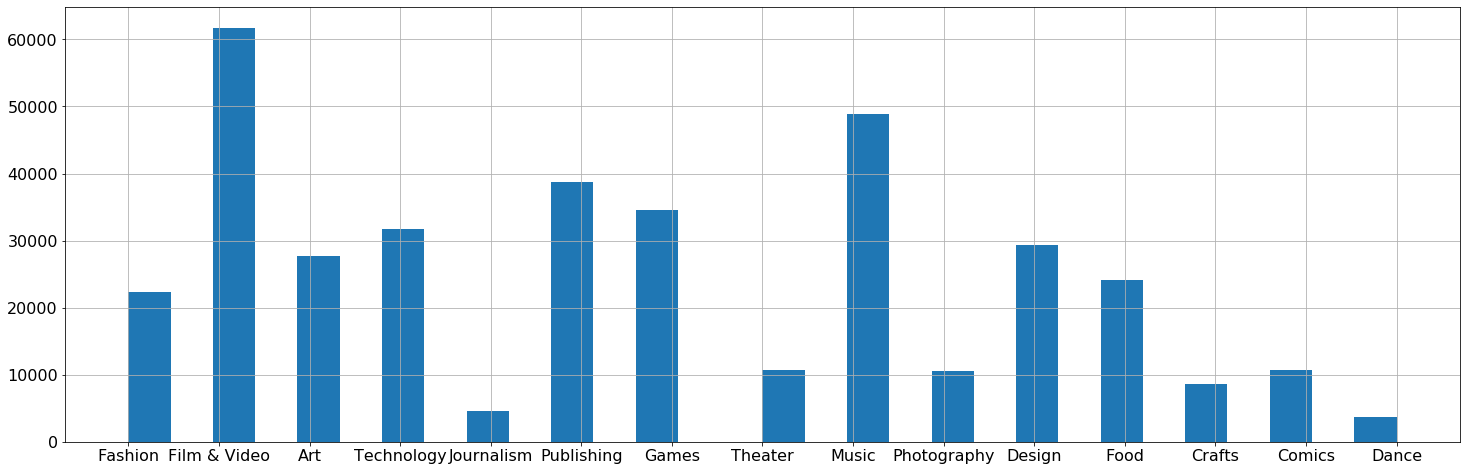

Film & Video    61760
Music           48809
Publishing      38779
Games           34596
Technology      31664
Design          29401
Art             27722
Food            24193
Fashion         22332
Theater         10716
Comics          10669
Photography     10613
Crafts           8624
Journalism       4655
Dance            3705
Name: main_category, dtype: int64

In [31]:
DF['main_category'].hist(figsize=(25, 8), bins=30)

plt.show()
DF['main_category'].value_counts()

### Wnioski:
1. 15 kategorii
2. najwęcej projektów w kategorii Film & Video
3. najmniej projektów w kategorii Dance

## Histogram głównych kategorii połączonych z podkategoriami

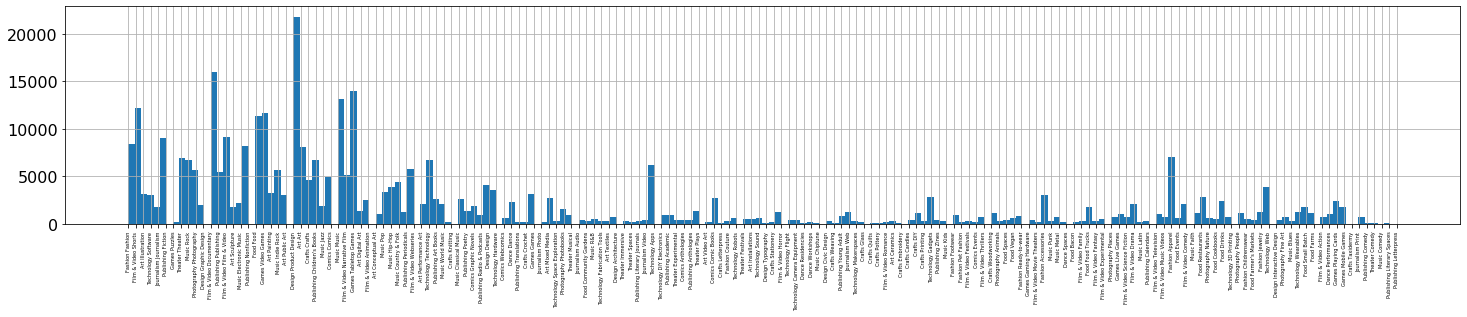

Design Product Design         21812
Film & Video Documentary      15968
Games Tabletop Games          13977
Music Music                   13123
Film & Video Shorts           12173
                              ...  
Music Chiptune                   34
Publishing Literary Spaces       23
Music Comedy                     17
Crafts Taxidermy                 11
Publishing Letterpress           10
Name: main_category_and_category, Length: 170, dtype: int64

In [30]:
DF['main_category_and_category'].hist(figsize=(25, 4), bins=200, xrot=90,xlabelsize=5 )
plt.show()
DF['main_category_and_category'].value_counts()

### Wnioski:
1. ??? coś nie tak

## Histogram krajów

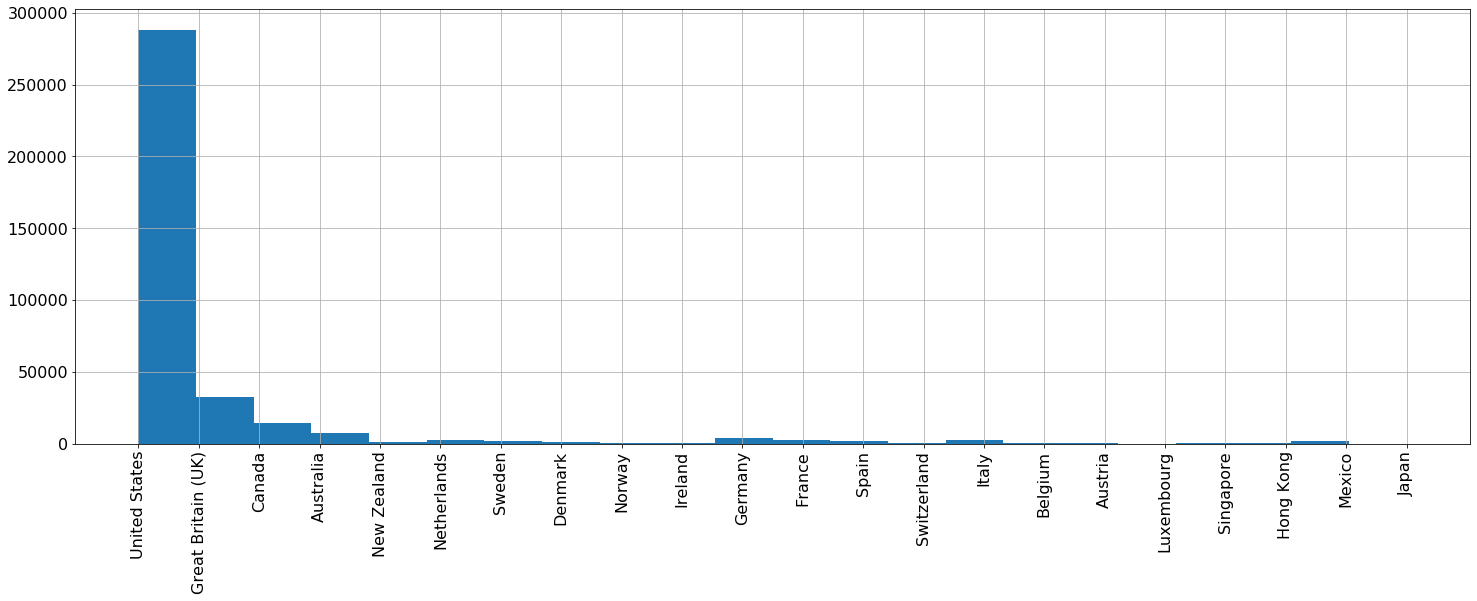

In [7]:
DF['country'].hist(figsize=(25, 8), bins=22, xrot=90)
plt.show()

### Wnioski:

## Histogram czasu trwania kampanii

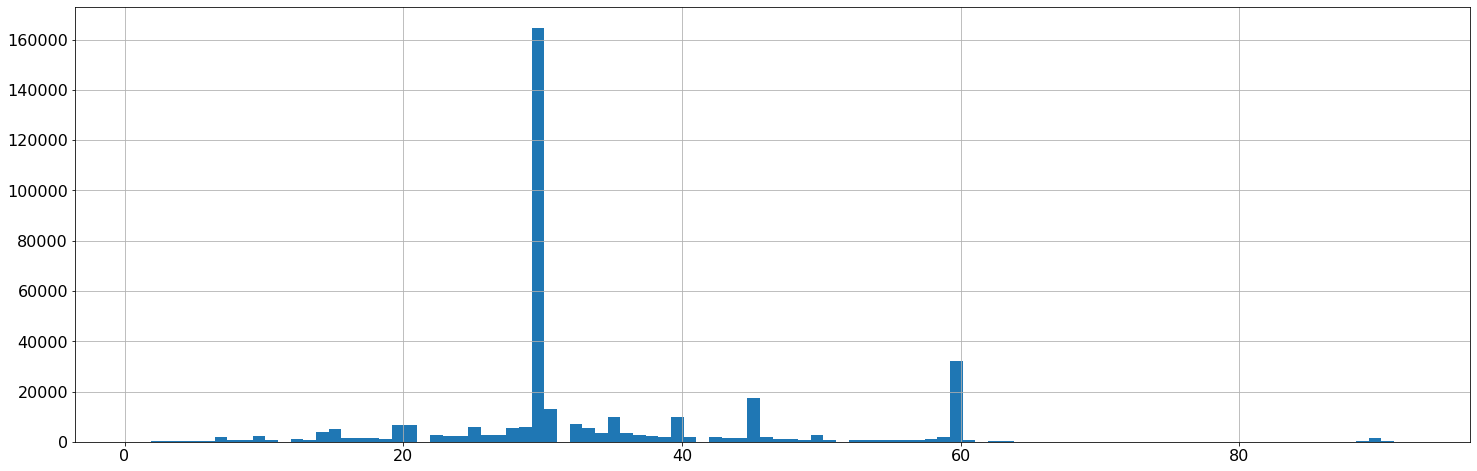

In [8]:
DF['duration'].hist(figsize=(25, 8), bins=100)
plt.show()

### Wnioski:

## Histogram założonego celu

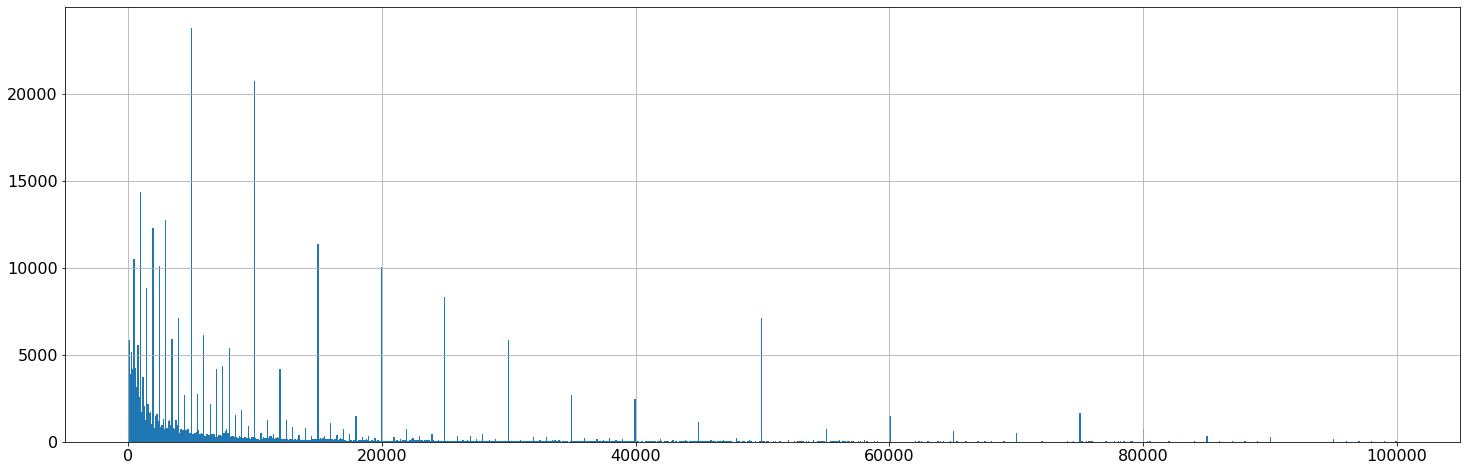

In [9]:
goal=DF['goal_in_usd']
goal[goal<100000].hist(figsize=(25, 8), bins=1000)
plt.show()

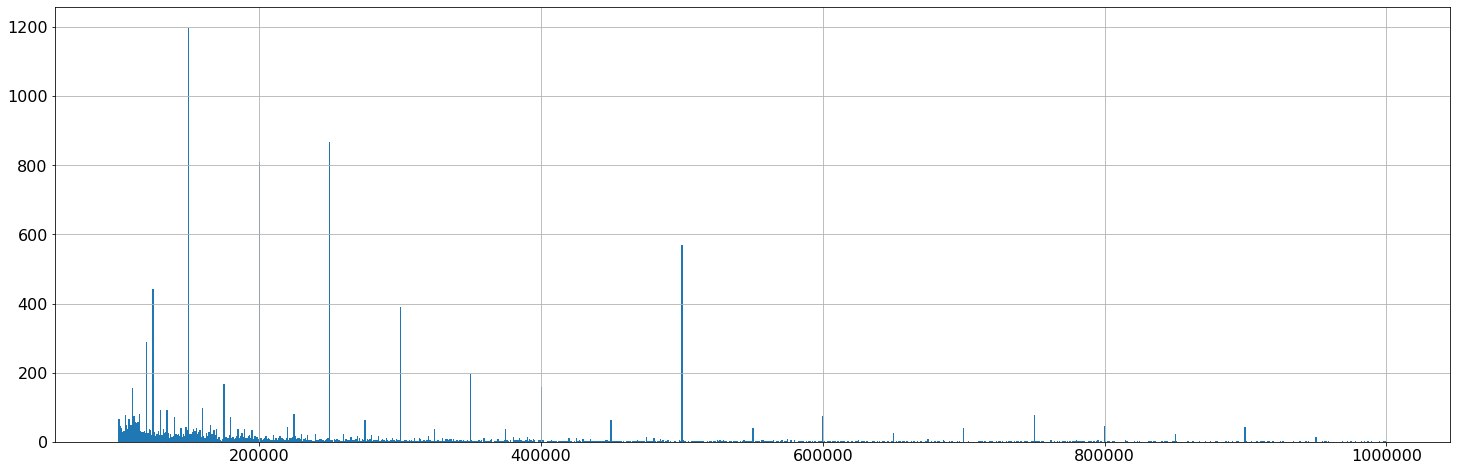

In [10]:
goal[(goal>100000) & (goal<1000000) ].hist(figsize=(25, 8), bins=1000)
plt.show()

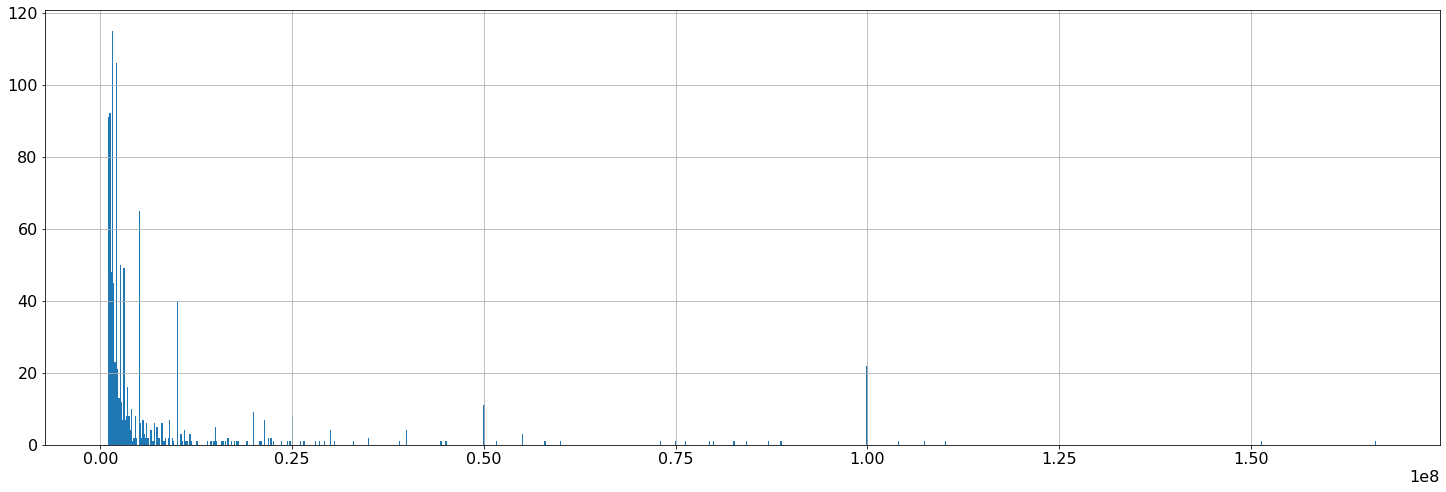

In [11]:
goal[goal>1000000 ].hist(figsize=(25, 8), bins=1000)
plt.show()

### Wnioski:

## Współczynnik sukcesu ze względu na kategorie główną

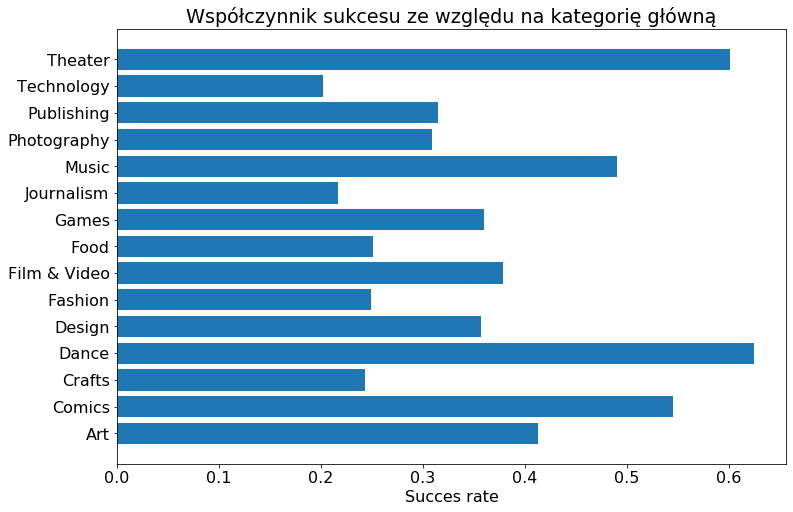

In [12]:
#grupujemy wartości na podstawie kategorii głównej
currency_state=DF.groupby('main_category')['state'].value_counts().unstack().fillna(0)

succes_rate={}
good=0
bad=0
unique_currency=currency_state.index

#dla każdego kraju wyliczamy succes_rate='successful'/'all'
for currency in unique_currency:
    good=currency_state.at[currency,'successful']
    bad=currency_state.at[currency,'failed']+currency_state.at[currency,'canceled']
    all_results=good+bad
    succes_rate[currency]=good/all_results

#przygotowujemy wartości x,y do pokazania na wykresie
x = list(succes_rate.keys())
y = list(succes_rate.values())

#tworzymy wykres
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(x, y)
ax.set_xlabel('Succes rate')
ax.set_title('Współczynnik sukcesu ze względu na kategorię główną')
plt.show()

### Wnioski:

## Współczynnik sukcesu ze względu na kategorię i podkategorię

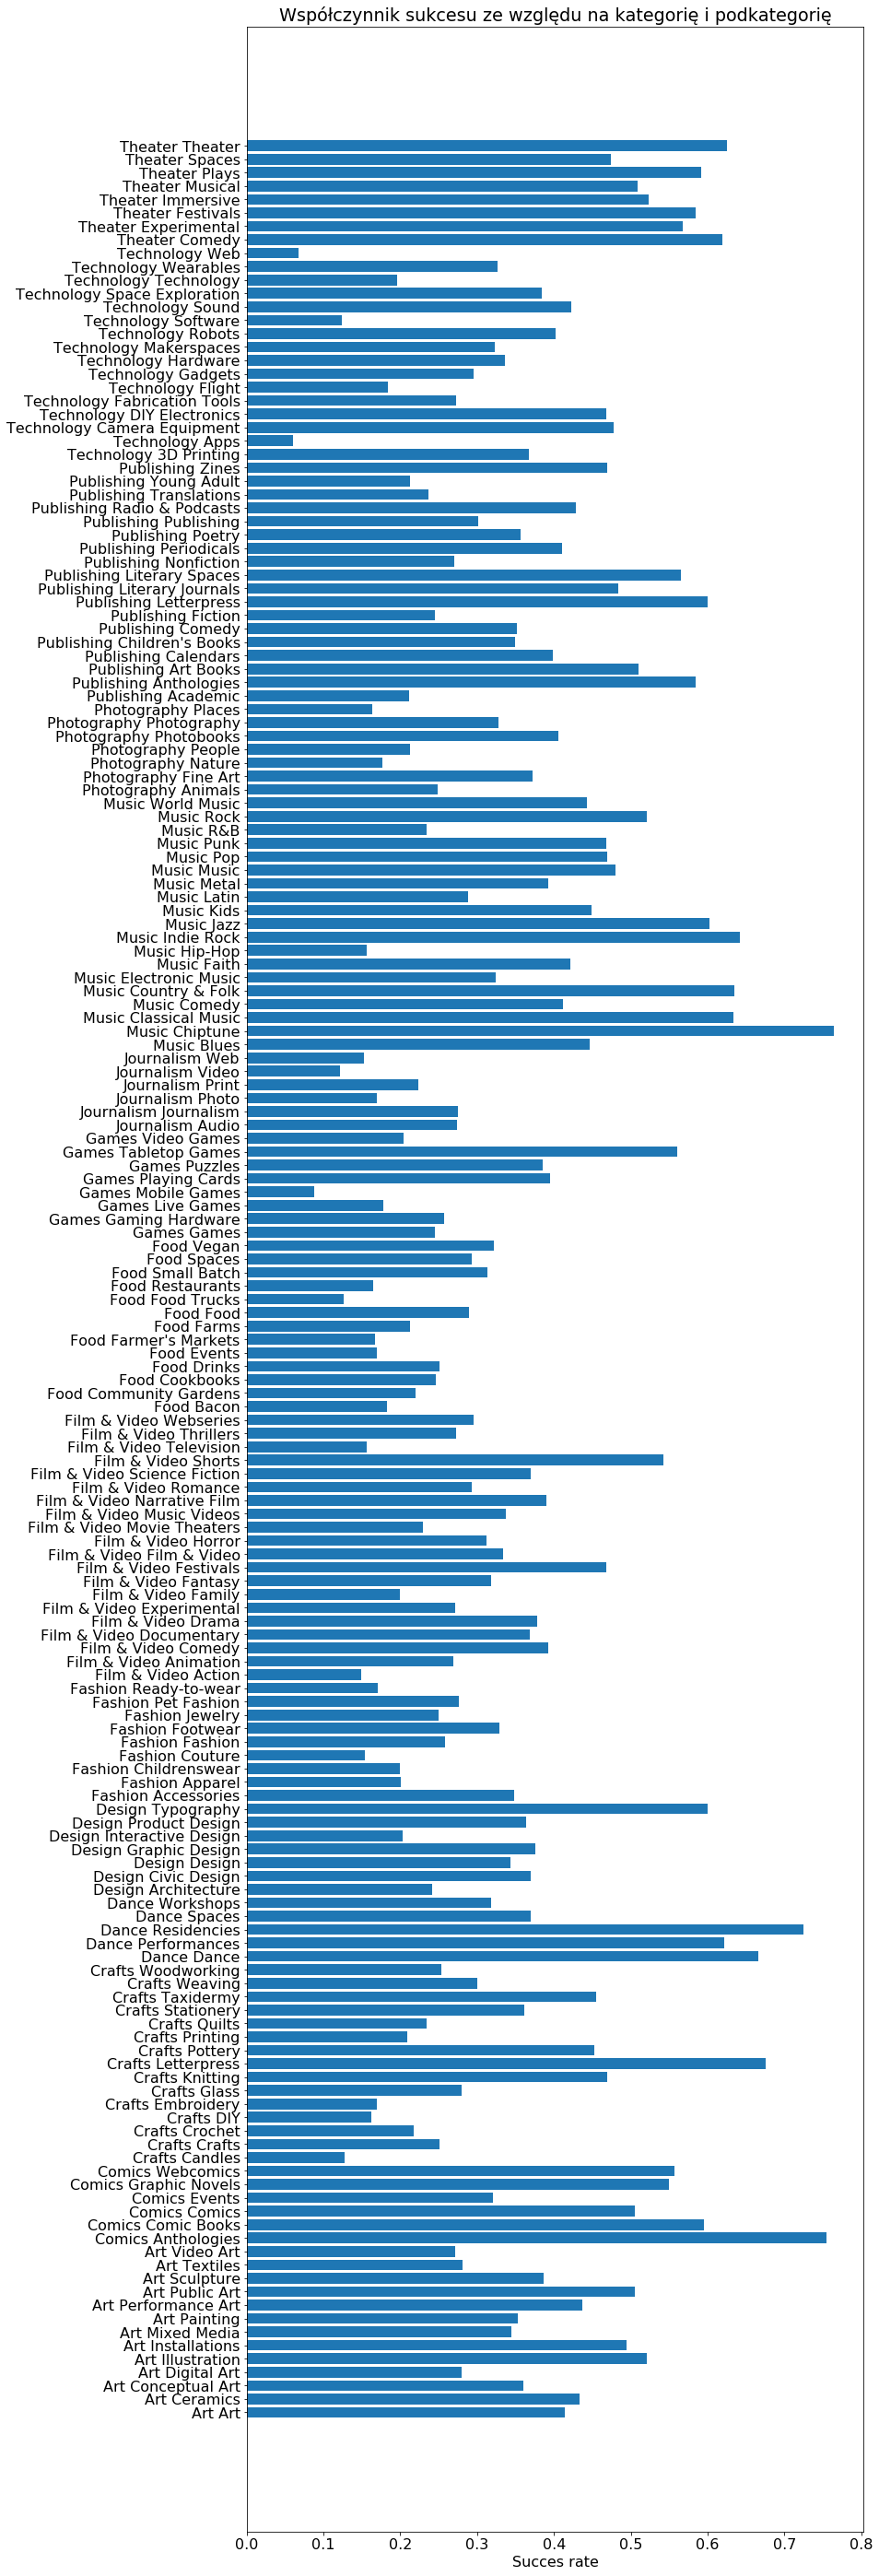

In [13]:
#grupujemy wartości na podstawie kategorii głównej i podkategorii
currency_state=DF.groupby('main_category_and_category')['state'].value_counts().unstack().fillna(0)

succes_rate={}
good=0
bad=0
unique_currency=currency_state.index

#dla każdego kraju wyliczamy succes_rate='successful'/'all'
for currency in unique_currency:
    good=currency_state.at[currency,'successful']
    bad=currency_state.at[currency,'failed']+currency_state.at[currency,'canceled']
    all_results=good+bad
    succes_rate[currency]=good/all_results

#przygotowujemy wartości x,y do pokazania na wykresie
x = list(succes_rate.keys())
y = list(succes_rate.values())

#tworzymy wykres
fig, ax = plt.subplots(figsize=(12, 50))
ax.barh(x, y)
ax.set_xlabel('Succes rate')
ax.set_title('Współczynnik sukcesu ze względu na kategorię i podkategorię')
plt.show()

### Wnioski:

## Współczynnik sukcesu ze względu na walutę

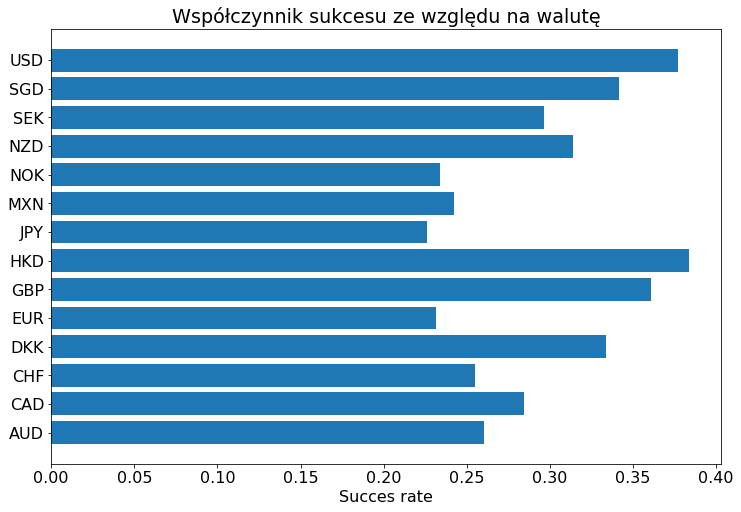

In [14]:
#grupujemy wartości na podstawie state
currency_state=DF.groupby('currency')['state'].value_counts().unstack().fillna(0)

succes_rate={}
good=0
bad=0
unique_currency=currency_state.index

#dla każdego kraju wyliczamy succes_rate='successful'/'all'
for currency in unique_currency:
    good=currency_state.at[currency,'successful']
    bad=currency_state.at[currency,'failed']+currency_state.at[currency,'canceled']
    all_results=good+bad
    succes_rate[currency]=good/all_results

#przygotowujemy wartości x,y do pokazania na wykresie
x = list(succes_rate.keys())
y = list(succes_rate.values())

#tworzymy wykres
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(x, y)
ax.set_xlabel('Succes rate')
ax.set_title('Współczynnik sukcesu ze względu na walutę')
plt.show()

### Wnioski:

## Współczynnik sukcesu ze względu na kraj

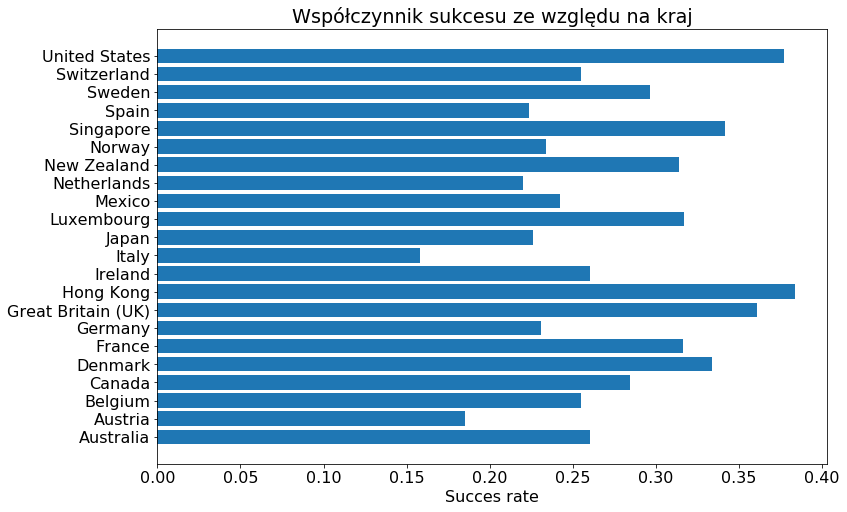

In [15]:
country_state=DF.groupby('country')['state'].value_counts().unstack().fillna(0)

succes_rate={}
good=0
bad=0
unique_country=country_state.index

for country in unique_country:
    good=country_state.at[country,'successful']
    bad=country_state.at[country,'failed']+country_state.at[country,'canceled']
    all_results=good+bad
    succes_rate[country]=good/all_results

x = list(succes_rate.keys())
y = list(succes_rate.values())

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(x, y)
ax.set_xlabel('Succes rate')
ax.set_title('Współczynnik sukcesu ze względu na kraj')
plt.show()

### Wnioski:

## Współczynnik sukcesu dla krajów, w których walutą jest euro

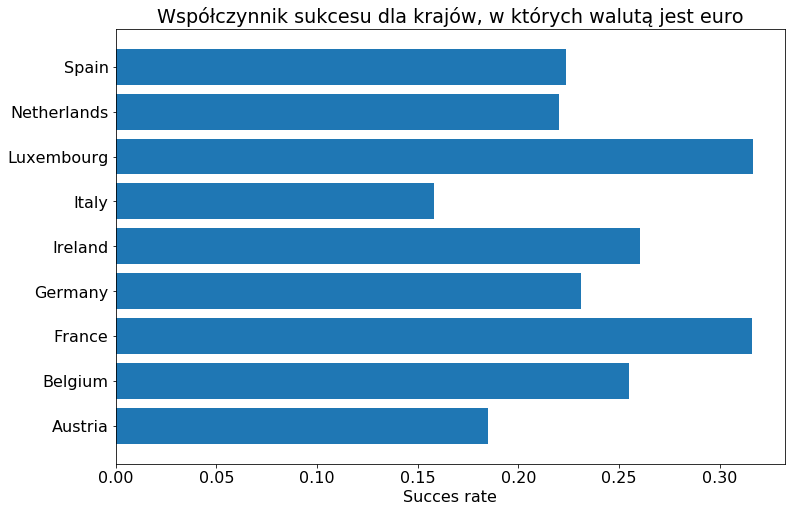

In [16]:
country_state=DF[DF['currency']=='EUR'].groupby('country')['state'].value_counts().unstack().fillna(0)

succes_rate={}
good=0
bad=0
unique_country=country_state.index

for country in unique_country:
    good=country_state.at[country,'successful']
    bad=country_state.at[country,'failed']+country_state.at[country,'canceled']
    all_results=good+bad
    succes_rate[country]=good/all_results

x = list(succes_rate.keys())
y = list(succes_rate.values())

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(x, y)
ax.set_xlabel('Succes rate')
ax.set_title('Współczynnik sukcesu dla krajów, w których walutą jest euro')
plt.show()

### Wnioski:

## Współczynnik sukcesu wyliczony na podstawie długości trwania kampanii

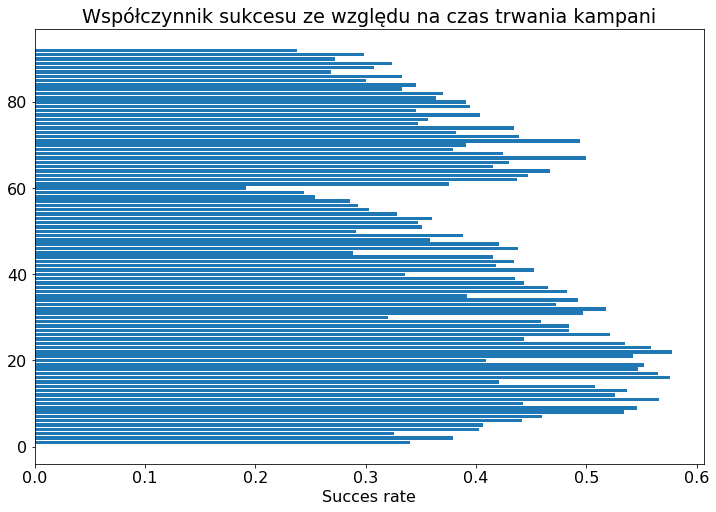

In [17]:
duration_state=DF.groupby('duration')['state'].value_counts().unstack().fillna(0)

succes_rate={}
good=0
bad=0
unique_duration=duration_state.index

for duration in unique_duration:
    good=duration_state.at[duration,'successful']
    bad=duration_state.at[duration,'failed']+duration_state.at[duration,'canceled']
    all_results=good+bad
    succes_rate[duration]=good/all_results

x = list(succes_rate.keys())
y = list(succes_rate.values())

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(x, y)
ax.set_xlabel('Succes rate')
ax.set_title('Współczynnik sukcesu ze względu na czas trwania kampani')
plt.show()

### Wnioski:

## Miesiąc rozpoczęcia kampanii

In [18]:
DF['launched_month']=DF['launched'].str.slice(start=5, stop=7, step=1)

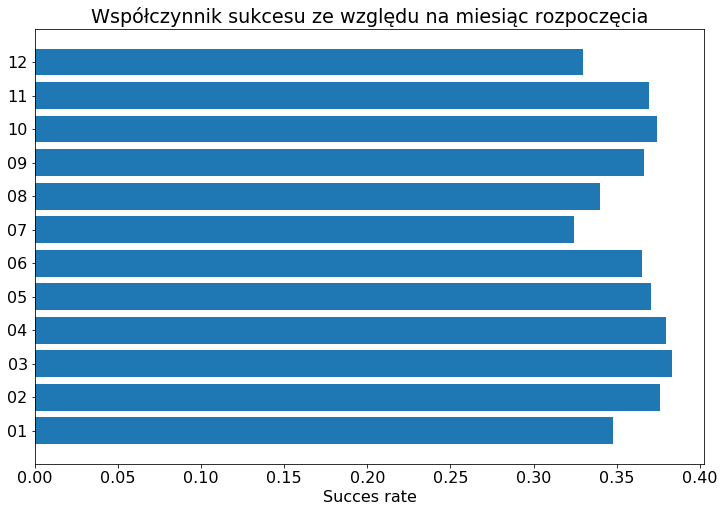

In [19]:
#grupujemy wartości na podstawie launched_month
currency_state=DF.groupby('launched_month')['state'].value_counts().unstack().fillna(0)

succes_rate={}
good=0
bad=0
unique_currency=currency_state.index

#dla każdego kraju wyliczamy succes_rate='successful'/'all'
for currency in unique_currency:
    good=currency_state.at[currency,'successful']
    bad=currency_state.at[currency,'failed']+currency_state.at[currency,'canceled']
    all_results=good+bad
    succes_rate[currency]=good/all_results

#przygotowujemy wartości x,y do pokazania na wykresie
x = list(succes_rate.keys())
y = list(succes_rate.values())

#tworzymy wykres
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(x, y)
ax.set_xlabel('Succes rate')
ax.set_title('Współczynnik sukcesu ze względu na miesiąc rozpoczęcia')
plt.show()

### Wnioski:

## Miesiąc zakończenia kampanii

In [20]:
DF['deadline_month']=DF['deadline'].str.slice(start=5, stop=7, step=1)

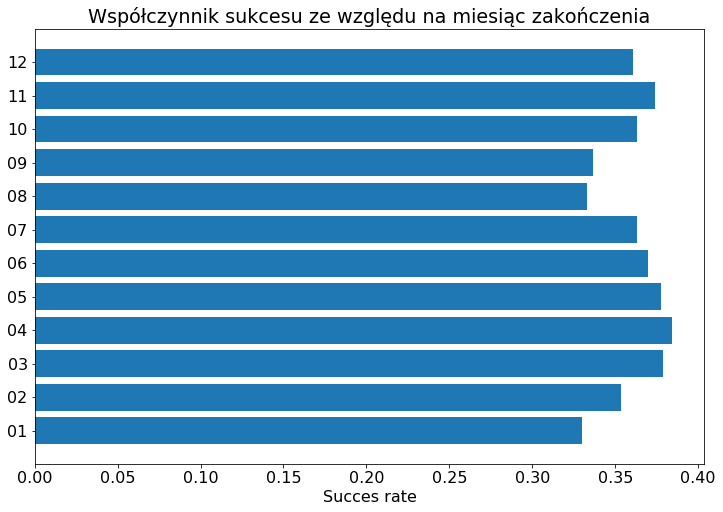

In [21]:
#grupujemy wartości na podstawie deadline_month
currency_state=DF.groupby('deadline_month')['state'].value_counts().unstack().fillna(0)

succes_rate={}
good=0
bad=0
unique_currency=currency_state.index

#dla każdego kraju wyliczamy succes_rate='successful'/'all'
for currency in unique_currency:
    good=currency_state.at[currency,'successful']
    bad=currency_state.at[currency,'failed']+currency_state.at[currency,'canceled']
    all_results=good+bad
    succes_rate[currency]=good/all_results

#przygotowujemy wartości x,y do pokazania na wykresie
x = list(succes_rate.keys())
y = list(succes_rate.values())

#tworzymy wykres
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(x, y)
ax.set_xlabel('Succes rate')
ax.set_title('Współczynnik sukcesu ze względu na miesiąc zakończenia')
plt.show()

### Wnioski: